### Importing the libraries

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Reading the data

In [2]:
data=pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data checks

In [3]:
#all columns have same number of null values which is equal to 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Preparation

In [5]:
data['dteday'] = pd.to_datetime(data['dteday'])

In [6]:
# Derving a new column from weekend called weekday which is more appropriate .The value will be 1 if it is sunday or 
# saturday else 0

def creating_weekend(i):
    if ((i==5) | (i==4)):
        return 1
    else:
        return 0
data['weekend']=[creating_weekend(i) for i in data['weekday']]
data.drop(columns=["weekday"],axis=1,inplace=True)

In [7]:
'''Converting the season to more interpretable category from 1 ,2 ,3 ,4 labels'''
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
data['season'] = data['season'].map(season_map)

In [8]:
season_map = pd.get_dummies(data['season'],drop_first = True)
data = pd.concat([data, season_map], axis = 1)

In [9]:
'''Converting the weathersit to more interpretable category from 1 ,2 ,3 ,4 labels'''
weathersit_map = {1:'Clear, Few clouds, Partly cloudy, Partly cloudy', 2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}
data['weathersit'] = data['weathersit'].map(weathersit_map)

In [10]:
weathersit_map = pd.get_dummies(data['weathersit'],drop_first = True)
data = pd.concat([data, weathersit_map], axis = 1)

In [11]:
'''Converting the mnth to more interpretable category from 1 ,2 ,3 ,4 etc labels'''
season_month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
data['mnth'] = data['mnth'].map(season_month)

In [12]:
month_map = pd.get_dummies(data['mnth'],drop_first = True)
data = pd.concat([data, month_map], axis = 1)

In [13]:
#dropping the irrevant columns
data.drop(columns=["instant","dteday","casual","registered"],axis=1,inplace=True)

In [14]:
Numerical_columns=["temp","atemp","hum","windspeed","cnt"]
Categorical_columns=["season","yr","mnth","holiday","workingday","weekend","weathersit"]
imp_columns=["temp","atemp","hum","windspeed","cnt","season","yr","mnth","holiday","workingday","weekend","weathersit"]

In [15]:
#checking the unique values across each columns in dataframe
data.nunique()

season                                                                                       4
yr                                                                                           2
mnth                                                                                        12
holiday                                                                                      2
workingday                                                                                   2
weathersit                                                                                   3
temp                                                                                       498
atemp                                                                                      689
hum                                                                                        594
windspeed                                                                                  649
cnt                                               

In [16]:
#checking the null values in each of the columns
data.isnull().sum()

season                                                                                     0
yr                                                                                         0
mnth                                                                                       0
holiday                                                                                    0
workingday                                                                                 0
weathersit                                                                                 0
temp                                                                                       0
atemp                                                                                      0
hum                                                                                        0
windspeed                                                                                  0
cnt                                                                   

<Figure size 1440x1080 with 0 Axes>

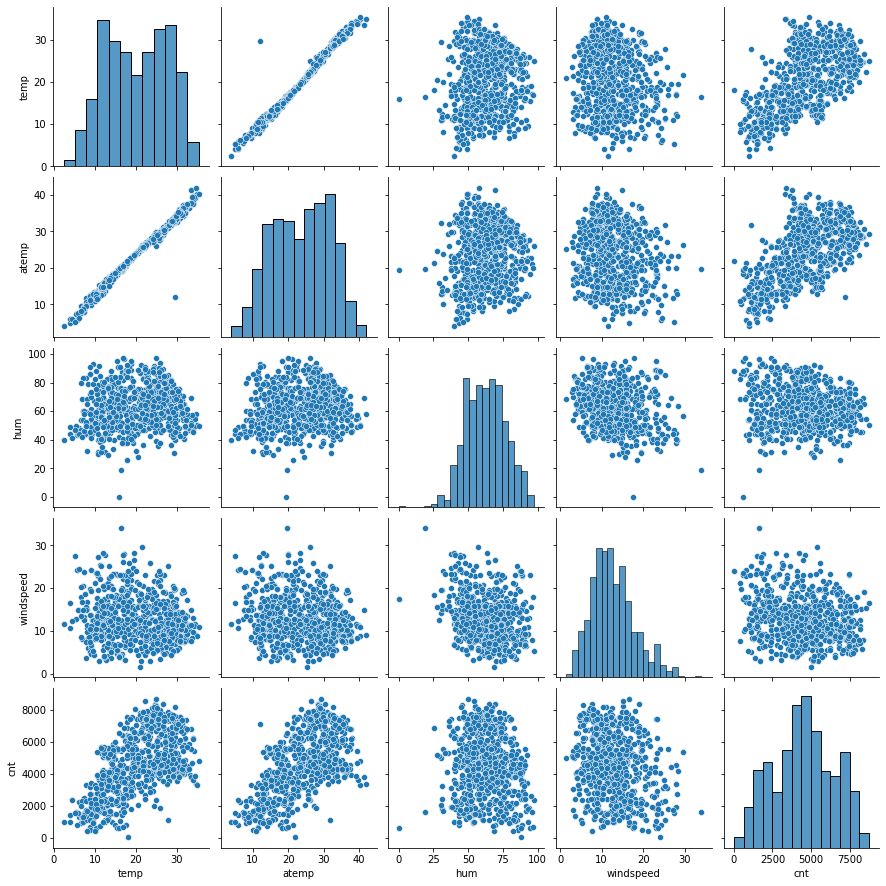

In [17]:
#pairplot between the numerical columns
plt.figure(figsize=(20,15))
sns.pairplot(data,vars=Numerical_columns)
plt.show()

/home/rishabh/py3_env/lib/python3.6/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x1080 with 0 Axes>

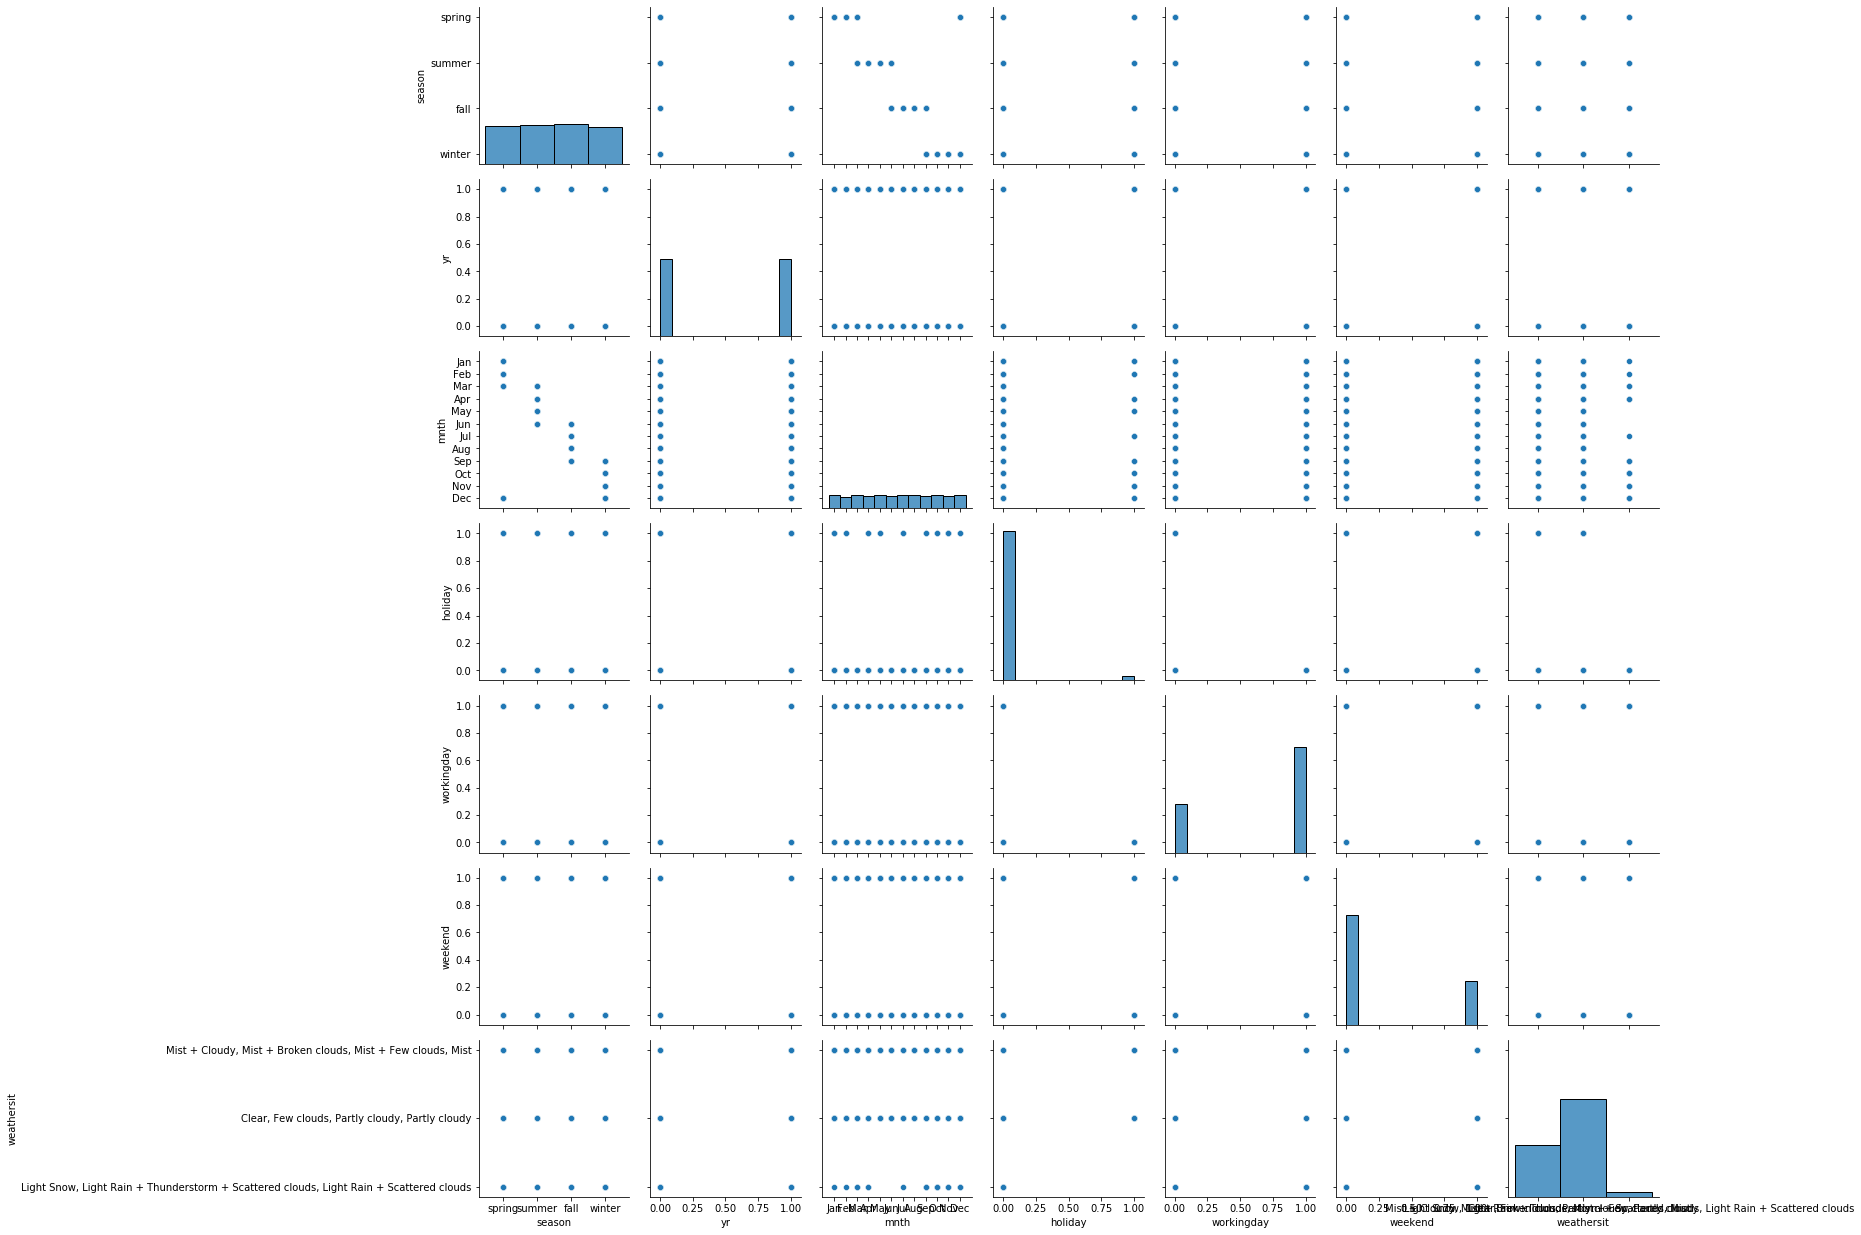

In [18]:
#pairplot between the categorical columns
plt.figure(figsize=(20,15))
sns.pairplot(data,vars=Categorical_columns)
plt.show()

In [19]:
data_plot=data[["season","yr","mnth","holiday","workingday","weathersit","temp","atemp","hum","windspeed","cnt","weekend"]]

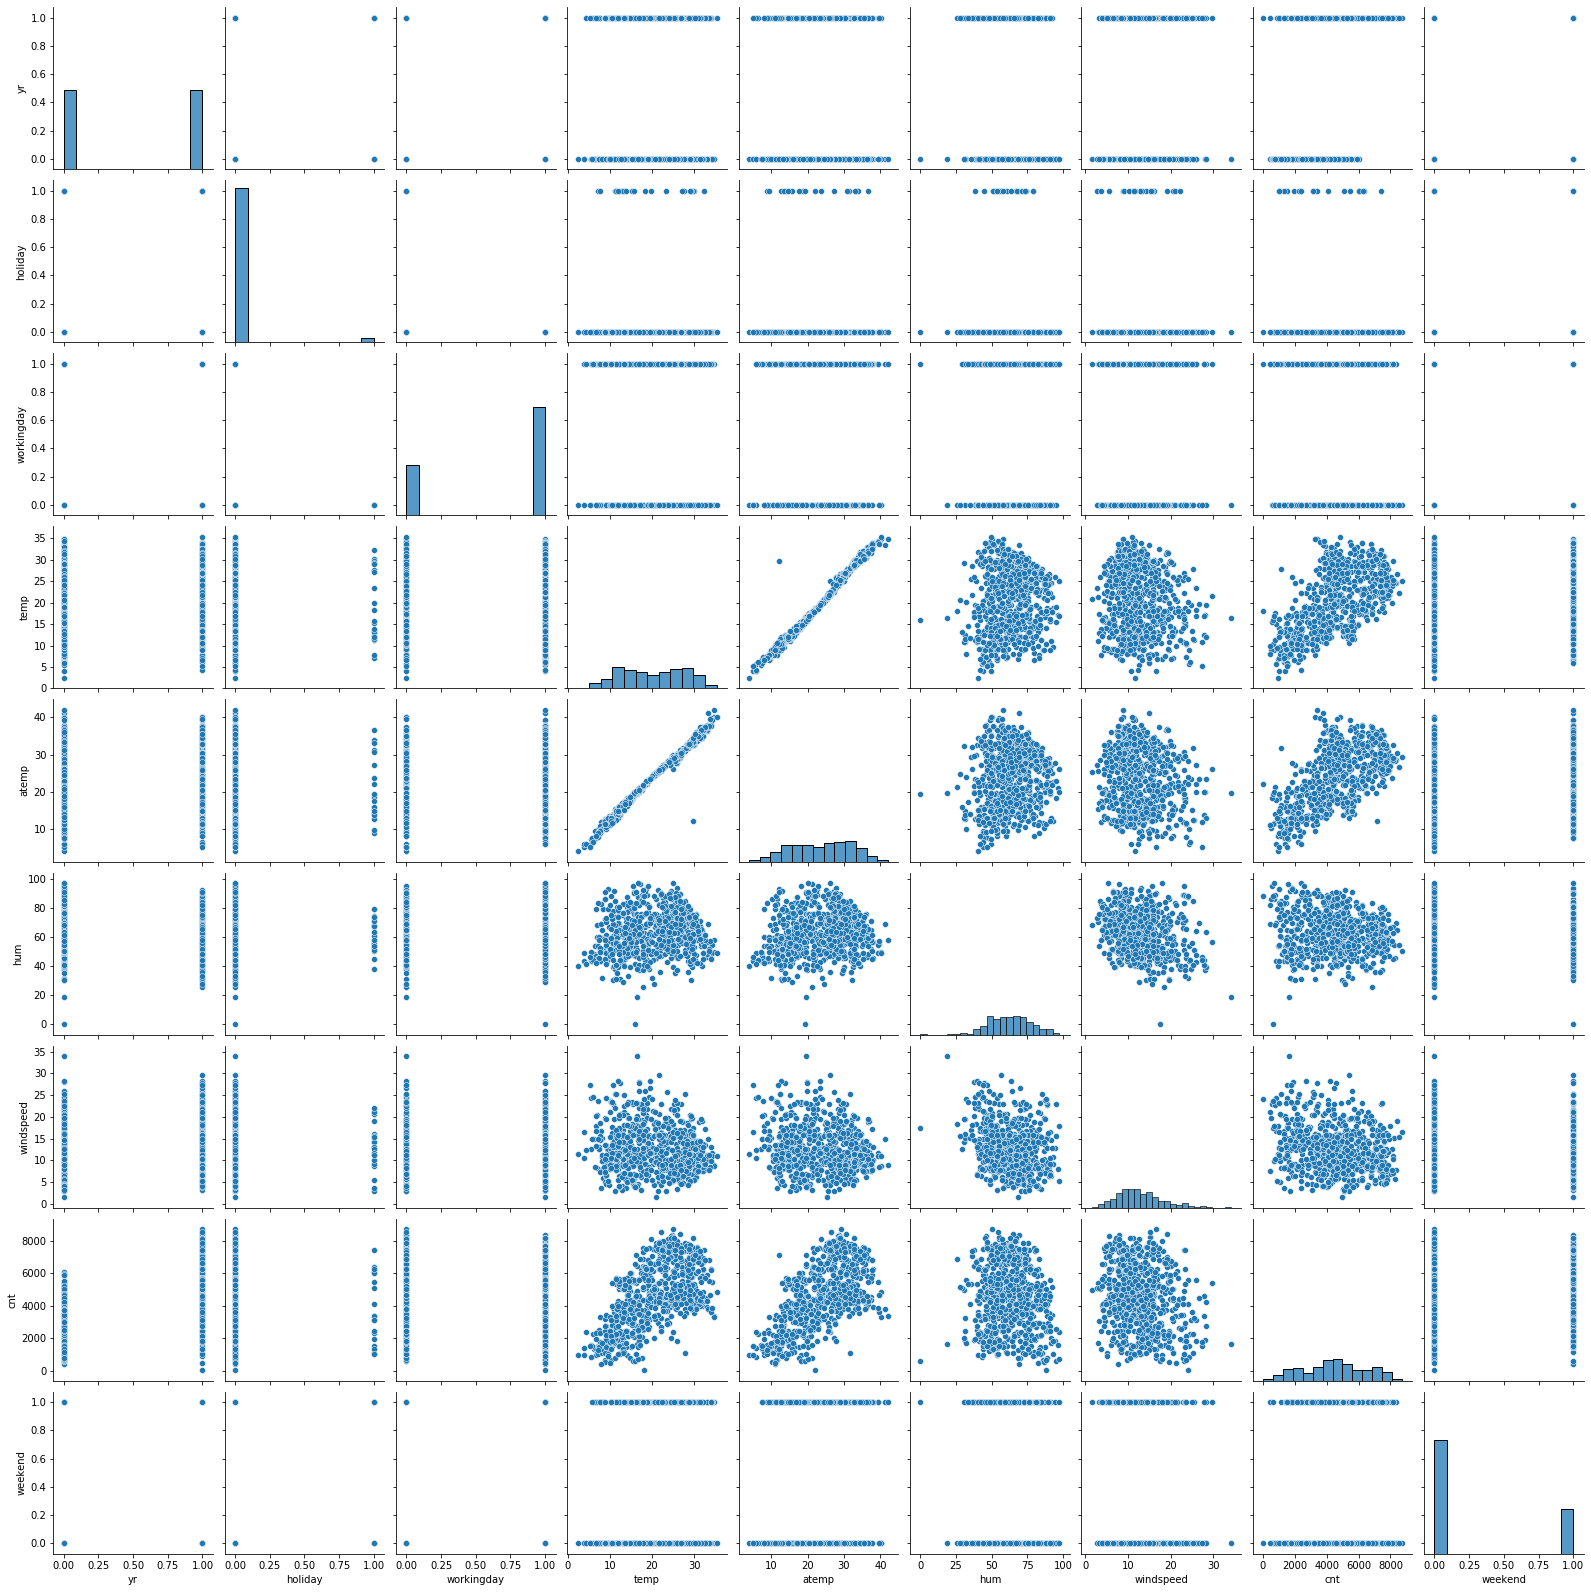

<Figure size 2160x864 with 0 Axes>

In [20]:
#pairplot of all imp columns
sns.pairplot(data_plot)
plt.figure(figsize=(30, 12))
plt.show()

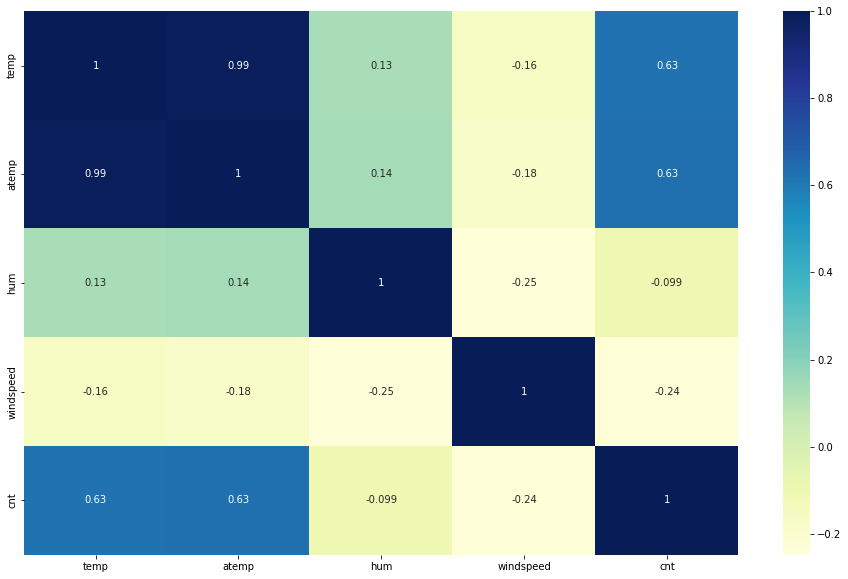

In [21]:
plt.figure(figsize = (16, 10))
sns.heatmap(data[["temp","atemp","hum","windspeed","cnt"]].corr(), annot = True, cmap="YlGnBu")
plt.show()


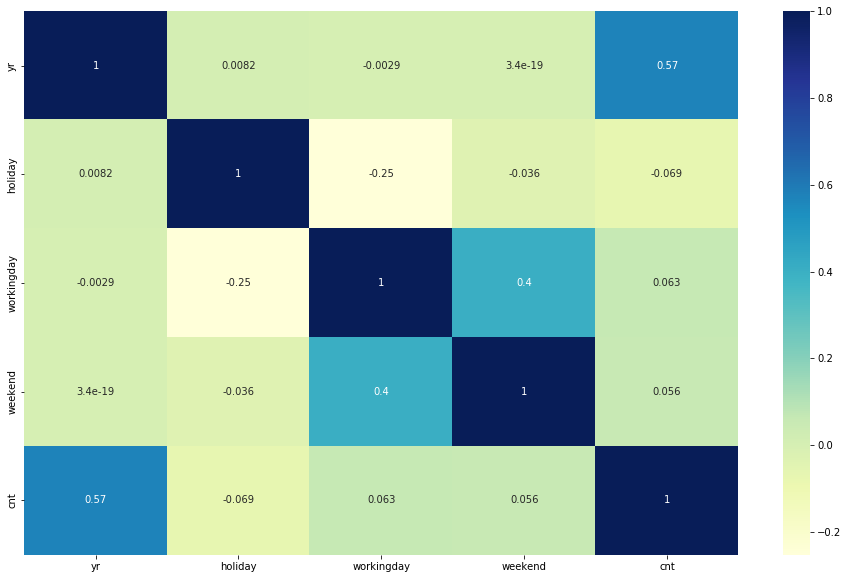

In [22]:
#correlation metrics for categorical features
plt.figure(figsize = (16, 10))
sns.heatmap(data[["season","yr","mnth","holiday","workingday","weekend","weathersit","cnt"]].corr(), annot = True, cmap="YlGnBu")
plt.show()


In [23]:
'''temp and atemp are highly correlated with the cnt after seeing the pairplot also with the help of correlation 
metrics they are also correlated btw themself'''

#simlarly windspeed is also somewhat correlated to the cnt

#simlarly yr is also somewhat correlated to the cnt


'temp and atemp are highly correlated with the cnt after seeing the pairplot also with the help of correlation \nmetrics they are also correlated btw themself'

### Data Exploration

##### outliers detection

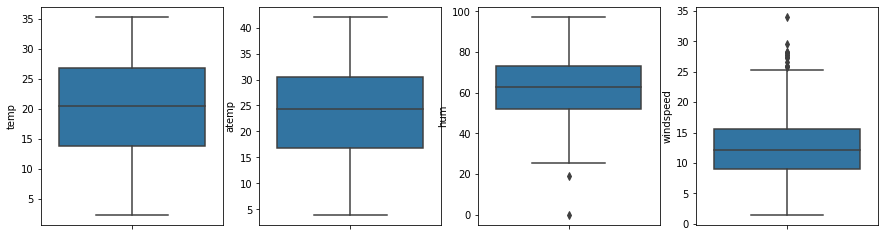

In [24]:
cols=Numerical_columns[:4]
plt.figure(figsize=(15,4))
i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=data)
    i+=1

#### removal of outliers

In [25]:
data=(data[data["windspeed"]<25])
data=(data[data["hum"]>20])

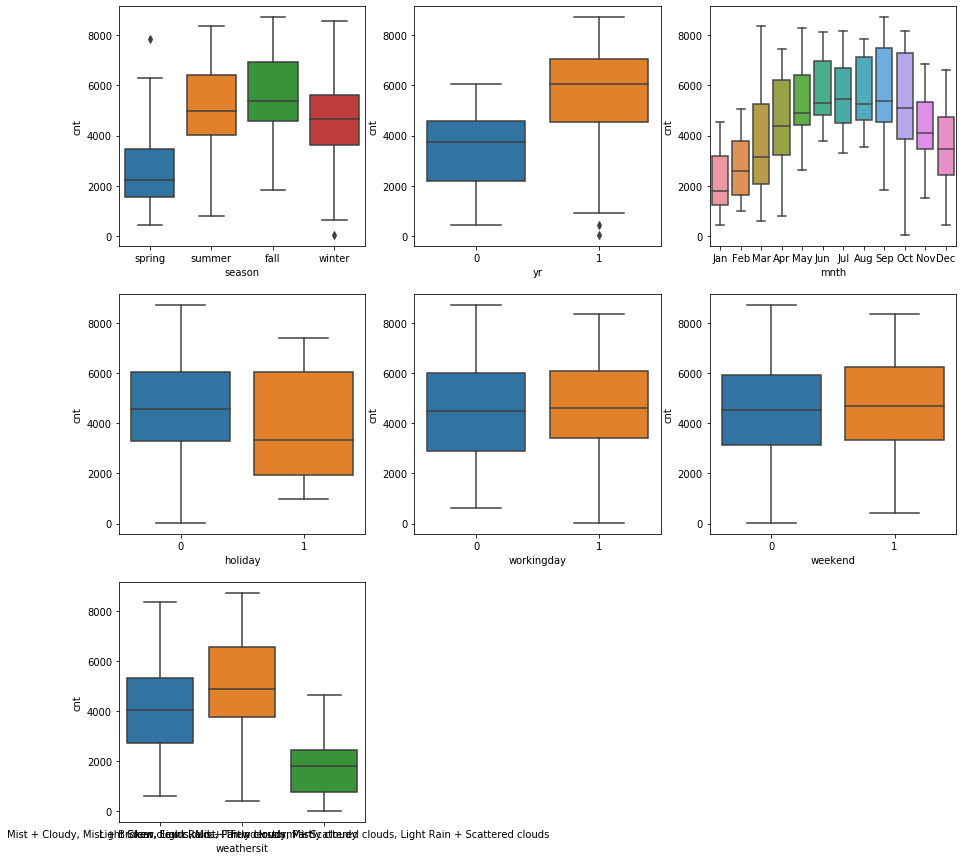

In [26]:
plt.figure(figsize=(15, 15))
for i in enumerate(Categorical_columns):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=data, x=i[1], y='cnt')
plt.show()

In [27]:
#season fall has higher value of cnts 
#yr 1 has higher value of cnts
#Sep has higher value of cnts

### Data split

In [28]:
#Dropping the categorical columns
data.drop(columns=["season","mnth","weathersit"],axis=1,inplace=True)

In [29]:
#performing the train test split
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
# scaling the numerical values
scaler = MinMaxScaler()
num_vars=["temp","atemp","hum","windspeed","cnt"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

/home/rishabh/py3_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/rishabh/py3_env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
#creating the X_train and y_train
y_train=df_train.pop("cnt")
X_train=df_train

In [32]:
#finding the top 10 features using RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20) 
rfe = rfe.fit(X_train, y_train)

In [33]:
#printing the top 20 features which has been found using RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekend', False, 4),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 3),
 ('Jun', True, 1),
 ('Mar', False, 5),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', True, 1),
 ('Sep', True, 1)]

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'winter',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 'Aug',
       'Dec', 'Feb', 'Jan', 'Jun', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['weekend', 'summer', 'Jul', 'Mar'], dtype='object')

In [36]:
#So keeping only top 20 features
X_train_RFE=X_train[col]

## Model 1

In [37]:
X_train_rfe = sm.add_constant(X_train_RFE)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     147.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.55e-189
Time:                        21:37:03   Log-Likelihood:                 530.07
No. Observations:                 498   AIC:                            -1018.
Df Residuals:                     477   BIC:                            -929.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/home/rishabh/py3_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [38]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,1351.59
3,temp,1346.81
5,hum,13.37
8,winter,9.78
6,windspeed,5.49
7,spring,5.17
17,Nov,4.70
18,Oct,4.19
2,workingday,3.44
12,Dec,3.14


In [39]:
#since temp has both high VIF and p value so dropping that from the features
X_train_RFE.drop(columns=["temp"],axis=1,inplace=True)

/home/rishabh/py3_env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Model 2

In [40]:
X_train_rfe = sm.add_constant(X_train_RFE)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     155.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.23e-190
Time:                        21:37:09   Log-Likelihood:                 530.07
No. Observations:                 498   AIC:                            -1020.
Df Residuals:                     478   BIC:                            -935.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/home/rishabh/py3_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,13.11
3,atemp,12.87
7,winter,9.73
5,windspeed,5.19
6,spring,5.16
16,Nov,4.69
17,Oct,4.19
2,workingday,3.43
11,Dec,3.12
9,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.69


In [42]:
#removing humidity as it has very high value
X_train_RFE.drop(columns=["hum"],axis=1,inplace=True)

/home/rishabh/py3_env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Model 3

In [43]:
X_train_rfe = sm.add_constant(X_train_RFE)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     155.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.43e-187
Time:                        21:37:14   Log-Likelihood:                 518.61
No. Observations:                 498   AIC:                            -999.2
Df Residuals:                     479   BIC:                            -919.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/home/rishabh/py3_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,winter,9.64
3,atemp,7.74
4,windspeed,5.16
5,spring,4.90
15,Nov,4.63
16,Oct,4.16
2,workingday,3.43
10,Dec,3.07
12,Jan,2.58
11,Feb,2.24


In [45]:
#removing winter as it has very high VIF value
X_train_RFE.drop(columns=["winter"],axis=1,inplace=True)

/home/rishabh/py3_env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## model 4

In [46]:
X_train_rfe = sm.add_constant(X_train_RFE)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     160.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.23e-185
Time:                        21:37:23   Log-Likelihood:                 512.67
No. Observations:                 498   AIC:                            -989.3
Df Residuals:                     480   BIC:                            -913.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/home/rishabh/py3_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,7.73
4,windspeed,5.15
5,spring,3.98
2,workingday,3.42
11,Jan,2.33
0,yr,2.05
10,Feb,2.04
8,Aug,1.62
7,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.62
12,Jun,1.47


In [48]:
#removing Nov as it has extremly high P value
X_train_RFE.drop(columns=["Nov"],axis=1,inplace=True)

/home/rishabh/py3_env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Model 5

In [49]:
X_train_rfe = sm.add_constant(X_train_RFE)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     171.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.13e-186
Time:                        21:37:34   Log-Likelihood:                 512.47
No. Observations:                 498   AIC:                            -990.9
Df Residuals:                     481   BIC:                            -919.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/home/rishabh/py3_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,7.73
4,windspeed,5.00
5,spring,3.88
2,workingday,3.34
11,Jan,2.32
0,yr,2.03
10,Feb,2.03
7,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.62
8,Aug,1.56
12,Jun,1.41


In [51]:
##removing Feb as it has extremly high P value
X_train_RFE.drop(columns=["Feb"],axis=1,inplace=True)

/home/rishabh/py3_env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Model 6

In [52]:
X_train_rfe = sm.add_constant(X_train_RFE)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     182.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.76e-187
Time:                        21:37:41   Log-Likelihood:                 511.68
No. Observations:                 498   AIC:                            -991.4
Df Residuals:                     482   BIC:                            -924.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/home/rishabh/py3_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,7.69
4,windspeed,5.00
2,workingday,3.32
5,spring,2.30
0,yr,2.02
10,Jan,1.66
7,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.62
8,Aug,1.56
11,Jun,1.41
12,May,1.40


In [54]:
##removing Dec as it has extremly high P value
X_train_RFE.drop(columns=["Dec"],axis=1,inplace=True)

/home/rishabh/py3_env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Model 7

In [55]:
X_train_rfe = sm.add_constant(X_train_RFE)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     195.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.06e-188
Time:                        21:37:48   Log-Likelihood:                 511.15
No. Observations:                 498   AIC:                            -992.3
Df Residuals:                     483   BIC:                            -929.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/home/rishabh/py3_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,7.69
4,windspeed,4.98
2,workingday,3.31
5,spring,2.28
0,yr,2.01
9,Jan,1.61
7,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.58
8,Aug,1.55
10,Jun,1.40
11,May,1.39


In [57]:
#Now two variables atemp has high VIF and holiday has high p values

### Model 8

In [58]:
X_train_RFE.drop(columns=["atemp"],axis=1,inplace=True)

/home/rishabh/py3_env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
X_train_rfe = sm.add_constant(X_train_RFE)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     153.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.36e-162
Time:                        21:37:57   Log-Likelihood:                 445.48
No. Observations:                 498   AIC:                            -863.0
Df Residuals:                     484   BIC:                            -804.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/home/rishabh/py3_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [60]:
# after dropping the atemp column the reduction in Adj. R-squared is almost 5% so it is not good idea to drop it
#even thu it has high VIF value

### Model 9

In [61]:
# Adding atemp back to dataframe

In [62]:
atemp=X_train[["atemp"]]

In [63]:
X_train_RFE=pd.concat([X_train_RFE,atemp],axis=1)

In [64]:
#removing holiday from the datframe
X_train_RFE.drop(columns=["holiday"],axis=1,inplace=True)

In [65]:
X_train_rfe = sm.add_constant(X_train_RFE)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     208.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          6.22e-189
Time:                        21:38:10   Log-Likelihood:                 509.60
No. Observations:                 498   AIC:                            -991.2
Df Residuals:                     484   BIC:                            -932.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/home/rishabh/py3_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,atemp,7.52
2,windspeed,4.95
1,workingday,3.11
3,spring,2.28
0,yr,2.01
7,Jan,1.61
5,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.58
6,Aug,1.54
8,Jun,1.39
9,May,1.39


In [67]:
#the VIF for windspeed is 4.98 which is  high lets check by dropping this column how the model is performing
X_train_RFE.drop(columns=["windspeed"],axis=1,inplace=True)

### Model 10

In [68]:
X_train_rfe = sm.add_constant(X_train_RFE)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.41e-186
Time:                        21:38:17   Log-Likelihood:                 501.19
No. Observations:                 498   AIC:                            -976.4
Df Residuals:                     485   BIC:                            -921.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/home/rishabh/py3_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,5.57
1,workingday,3.03
0,yr,2.01
2,spring,1.99
6,Jan,1.61
4,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.55
5,Aug,1.51
7,Jun,1.39
8,May,1.39
10,Sep,1.34


In [70]:
# since after dropping the windspeed variable the Adjusted R squared value drops by only 0.5% and the VIF of other
#variables improve by significant amount so will be dropping the windspeed column in modelling

### Model 11

In [71]:
# Jan and Jun has more than 5% p values lets deal with it

In [72]:
X_train_RFE.drop(columns=["Jan"],axis=1,inplace=True)

In [73]:
X_train_rfe = sm.add_constant(X_train_RFE)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     236.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.58e-187
Time:                        21:38:26   Log-Likelihood:                 499.31
No. Observations:                 498   AIC:                            -974.6
Df Residuals:                     486   BIC:                            -924.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/home/rishabh/py3_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,atemp,5.52
1,workingday,3.03
0,yr,2.00
4,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.55
5,Aug,1.51
2,spring,1.39
6,Jun,1.39
7,May,1.38
9,Sep,1.33
8,Oct,1.22


### Model 12

In [75]:
X_train_RFE.drop(columns=["Jun"],axis=1,inplace=True)

In [76]:
X_train_rfe = sm.add_constant(X_train_RFE)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     258.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.65e-187
Time:                        21:38:30   Log-Likelihood:                 497.68
No. Observations:                 498   AIC:                            -973.4
Df Residuals:                     487   BIC:                            -927.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/home/rishabh/py3_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,atemp,4.61
1,workingday,3.03
0,yr,2.00
4,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.54
5,Aug,1.37
2,spring,1.35
6,May,1.28
8,Sep,1.25
7,Oct,1.17
3,"Light Snow, Light Rain + Thunderstorm + Scatte...",1.04


In [78]:
# Now all VIF value is below 5 but the P value for aug is greater than 5%  so we need to drop that

### Model 13

In [79]:
X_train_RFE.columns

Index(['yr', 'workingday', 'spring',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 'Aug',
       'May', 'Oct', 'Sep', 'atemp'],
      dtype='object')

In [80]:
X_train_RFE.drop(columns=["Aug"],axis=1,inplace=True)

In [81]:
X_train_rfe = sm.add_constant(X_train_RFE)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     285.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.69e-188
Time:                        21:38:39   Log-Likelihood:                 496.29
No. Observations:                 498   AIC:                            -972.6
Df Residuals:                     488   BIC:                            -930.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/home/rishabh/py3_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,atemp,3.92
1,workingday,3.03
0,yr,2.00
4,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.54
2,spring,1.32
5,May,1.20
7,Sep,1.19
6,Oct,1.13
3,"Light Snow, Light Rain + Thunderstorm + Scatte...",1.04


### Model 14 --final model

In [83]:
X_train_RFE.drop(columns=["May"],axis=1,inplace=True)

In [84]:
X_train_rfe = sm.add_constant(X_train_RFE)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     319.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.01e-188
Time:                        21:38:47   Log-Likelihood:                 494.63
No. Observations:                 498   AIC:                            -971.3
Df Residuals:                     489   BIC:                            -933.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/home/rishabh/py3_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [85]:
lm.params


const                                                                                      0.237546
yr                                                                                         0.235337
workingday                                                                                 0.029583
spring                                                                                    -0.150686
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   -0.294284
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                              -0.068713
Oct                                                                                        0.078112
Sep                                                                                        0.060660
atemp                                                                                      0.383594
dtype: float64

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,atemp,3.64
1,workingday,3.02
0,yr,2.00
4,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.54
2,spring,1.30
6,Sep,1.16
5,Oct,1.12
3,"Light Snow, Light Rain + Thunderstorm + Scatte...",1.04


In [87]:
#now for all features the VIF  as well as the P values are in the acceptable range so these are the final features

~ Clearly the important features are yr ,workingday,spring,Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds,Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ,oct,sep,atemp

~ cnt =0.237546+0.060660 X (atemp) + 0.029583 X (workingday) + 0.235337 X (yr) - 0.294284X (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) - 0.150686 X (spring) + 0.060660 X (Sep) + 0.078112 X (Oct) - 0.068713 X (Mist + Broken clouds, Mist + Few clouds, Mist)

~ the cnt is highly dependent on atemp after atemp it is dependent dependent on yr and it is inversly related to spring,Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds,

### Residual Analysis

In [88]:
y_train_pred=lm.predict(X_train_rfe)

/home/rishabh/py3_env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

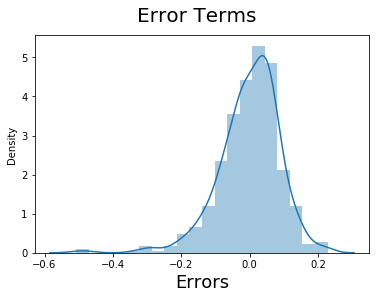

In [89]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                

In [90]:
# The error terms is normally distributed with mean zero

### Linearity check

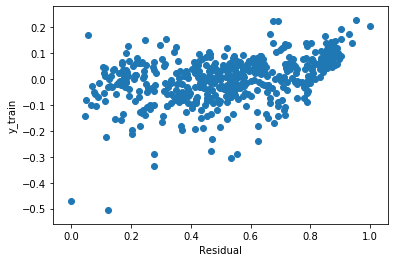

In [91]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [92]:
#The residual terms are randomlly distributed which means only white noise is present and they are 
#independent of each other and have constant variance

### Model Evaluation

In [93]:
num_vars=["temp","atemp","hum","windspeed","cnt"]
df_test[num_vars] = scaler.transform(df_test[num_vars])

/home/rishabh/py3_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/rishabh/py3_env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [94]:
y_test=df_test.pop('cnt')
X_test=df_test[['yr', 'workingday', 'spring',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 'Oct',
       'Sep', 'atemp']]

In [95]:
X_test_rfe = sm.add_constant(X_test)
y_test_pred=lm.predict(X_test_rfe)

/home/rishabh/py3_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [96]:
r_squared = r2_score(y_test, y_test_pred)

In [97]:
r_squared


0.7772517191258677

In [98]:
# The r squared value on test data is 77.72

Text(0, 0.5, 'Views')

<Figure size 1800x1800 with 0 Axes>

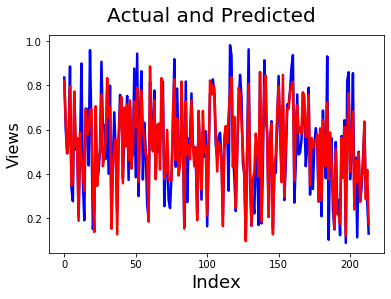

In [99]:
#Actual vs Predicted
c = [i for i in range(0,214,1)]
plt.figure(figsize=(25, 25))
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)               
plt.xlabel('Index', fontsize=18)                             
plt.ylabel('Views', fontsize=16)                               

Text(0, 0.5, 'Views_show-Predicted_views')

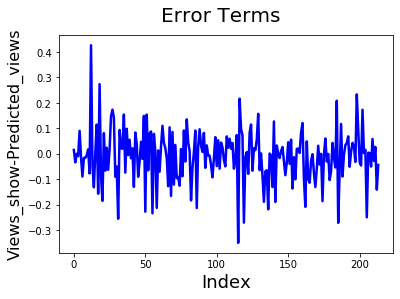

In [100]:
# Error terms
c = [i for i in range(0,214,1)]
fig = plt.figure()
plt.plot(c,y_test-y_test_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label


Text(0, 0.5, 'y_pred')

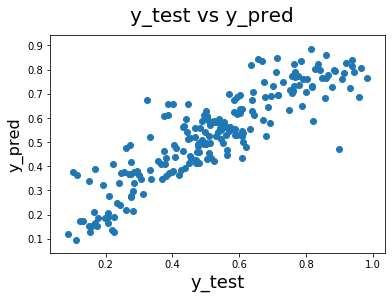

In [101]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

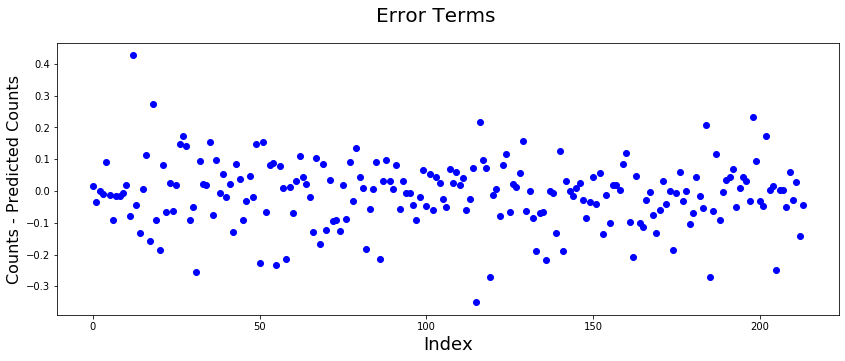

In [102]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(0,214,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              
    plt.xlabel('Index', fontsize=18)                     
    plt.ylabel('Counts - Predicted Counts', fontsize=16) 

plot_err_terms(y_test,y_test_pred)

In [103]:
# clearly from the above the model is fitted quite well

## Fitting model using SKlearn package

#### Fitting the model

In [104]:
lm_sklearn = LinearRegression()
lm_sklearn.fit(X_train_RFE, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### checking on train data

In [105]:
y_train_pred=lm_sklearn.predict(X_train_RFE)
r_squared = r2_score(y_train, y_train_pred)

In [106]:
r_squared = r2_score(y_train, y_train_pred)

In [107]:
print(r_squared)

0.8393544332817199


#### Evaluating on test data 


In [108]:
y_test_pred=lm_sklearn.predict(X_test)

In [109]:
r_squared = r2_score(y_test, y_test_pred)

In [110]:
print(r_squared)

0.7772517191258697
